In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import ModelClass

from matplotlib import pyplot as plt
import seaborn as sns
from sklearnex import patch_sklearn
patch_sklearn(verbose=False)
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import plot_confusion_matrix, recall_score, accuracy_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor


In [2]:
X = pd.read_csv('data/Training-set-values.csv')
y = pd.read_csv('data/Training-set-labels.csv')

X['date_recorded'] = pd.to_datetime(X['date_recorded']).astype(np.int64)

#### Preprocessors

In [3]:
# Super basic numeric transformer

numeric_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='median'))]
)

numeric_preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, make_column_selector(dtype_include=np.number)),
    ]
)

### Models

In [4]:
# Gradient Boost
GradBoost = {'classifier': GradientBoostingClassifier(),'preprocessor': numeric_preprocessor}
#GradBoost2 = {'classifier': GradientBoostingClassifier(),'preprocessor': None}
#GradBoost3 = {'classifier': GradientBoostingClassifier(),'preprocessor': None}
# XGradient Boosting
#XGBoost = {'classifier': XGBRegressor(objective='reg:squarederror'), 'preprocessor': numeric_preprocessor}
# CatBoost
#CatBoost = {'classifier': CatBoostClassifier(max_depth=3),'preprocessor': numeric_preprocessor}



models = {'GradientBoost': GradBoost,
    #'GradientBoost2': GradBoost2,
    #'GradientBoost3': GradBoost3,
    #'XGBoost': XGBoost,
    #'CatBoost': CatBoost
    }


### Modeler

In [5]:
model_run = ModelClass.Modeler(models, X=X, y=y)

# after the model_run object is created so we can add onto the default preprocessor.
#log_reg_regularized = {'classifier': LogisticRegression(n_jobs=3), 'preprocessor': model_run.create_default_prep(num_add=[('scaling', StandardScaler())])}
#model_run.add_model('log_reg_regularized', log_reg_regularized)

### Search parameters and kwargs

In [6]:
GradBoost_params = dict(n_estimators=np.array(range(100, 400)),
                    criterion=['friedman_mse', 'squared_error'],
                    max_depth=np.array(range(2, 5)),
                    min_samples_split=np.array(range(6, 10)),
                    min_samples_leaf=np.array(range(4, 10)),
                    learning_rate=stats.uniform(loc=0.01, scale=1))

GradBoost3_params = dict(n_estimators=np.array(range(200, 1000)),
                    criterion=['friedman_mse', 'squared_error'],
                    max_depth=np.array(range(2, 10)),
                    min_samples_split=np.array(range(2, 10)),
                    min_samples_leaf=np.array(range(1, 10)),
                    learning_rate=stats.uniform(loc=0.001, scale=1))

XGBoost_params = dict(learning_rate =stats.uniform(loc=0.1, scale=0.1),
                    n_estimators=np.array(range(100,1200)),
                    max_depth=np.array(range(4,30)))

CatBoost_params = dict(max_depth =[3,4,5],
                         n_estimators = [100,200,300])

search_options = {'n_jobs': 3, 'random_state': 9280210, 'n_iter': 20}

## RandomizedSearchCV

In [7]:
model_run.hyper_search('GradientBoost', params=GradBoost_params, searcher_kwargs=search_options, set_to_train=True)

In [8]:
#model_run.hyper_search('GradientBoost2', params=GradBoost_params, searcher_kwargs=search_options, set_to_train=True)

In [9]:
#model_run.hyper_search('GradientBoost3', params=GradBoost3_params, searcher_kwargs=search_options, set_to_train=True)

In [10]:
#model_run.hyper_search('XGBoost', params=XGBoost_params, searcher_kwargs=search_options, set_to_train=True)

In [11]:
#model_run.hyper_search('CatBoost', params=CatBoost_params, searcher_kwargs=search_options, set_to_train=True)

## Test Models

In [12]:
# Gradient Boost
gb_model=model_run.get_model('GradientBoost')['model_pipeline']
Gradient_Boost = gb_model.score(X=model_run._X_test, y=model_run._y_test)
Gradient_Boost

0.6938720538720539

In [13]:
model_run.test_model('GradientBoost')

root - INFO - GradientBoost test score: 0.6938720538720539


### Model 1

In [15]:
model_run.hyper_search('GradientBoost', params=GradBoost_params, searcher_kwargs=search_options, print=True)

root - INFO - For model GradientBoost, RandomizedSearchCV with{'classifier__n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
       217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
       243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255,
       256, 257, 258, 259, 260, 261, 262, 263

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
Train Accuracy :  0.8174
Test Accuracy :  0.6939
------------------------------------------------------------

                         precision    recall  f1-score   support

             functional       0.71      0.80      0.76      8093
functional needs repair       0.51      0.22      0.30      1086
         non functional       0.68      0.63      0.65      5671

               accuracy                           0.69     14850
              macro avg       0.63      0.55      0.57     14850
           weighted avg       0.68      0.69      0.68     14850

------------------------------------------------------------




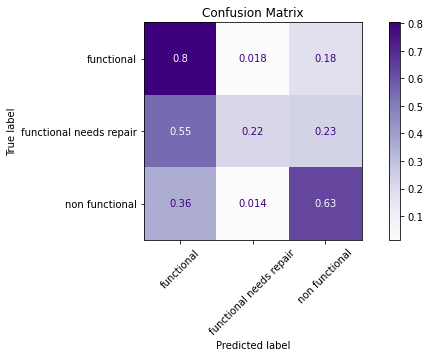

(<Figure size 720x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>)

In [16]:
model_run.model_evaluation('GradientBoost')

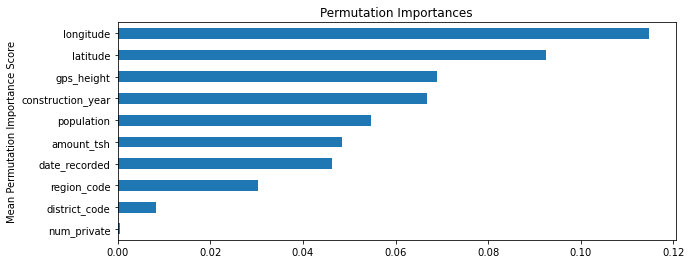

In [17]:
importance_kwargs = dict(n_repeats=10, n_jobs=3)
model_run.permutation_importance('GradientBoost', perm_kwargs=importance_kwargs)